<div class='alert alert-info'>
    <h3>Simple Linear regretion</h3>
</div>

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
# ols --> ordinary less squared
lm = smf.ols(formula="Sales~TV", data=data).fit()

In [22]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

<div class='alert alert-warning'>
    <p>El modelo predictivo seria:</p>
<p>Sales = 7.032594 + 0.047537*TV</p>
</div>

In [23]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [34]:
lm.rsquared

0.611875050850071

In [25]:
lm.rsquared_adj

0.6099148238341623

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        11:40:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Realicemos una prediccion

In [27]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))

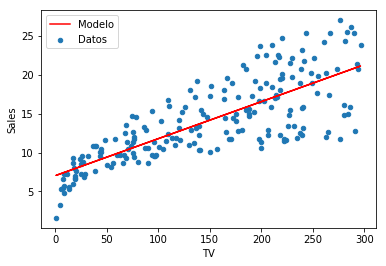

In [28]:
data.plot(kind='scatter', x='TV', y='Sales', label='Datos')
plt.plot(pd.DataFrame(data['TV']), sales_pred, 'r', label='Modelo')
plt.legend(loc=0)
plt.show()

In [29]:
lm.predict(pd.DataFrame([140], columns=['TV']))

0    13.687723
dtype: float64

<div class='alert alert-info'>
    <h3>Linear regretion multiple</h3>
</div>

In [30]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
# Agregamos Newspaper al modelo lineal
lm2 = smf.ols(formula='Sales~TV+Newspaper', data=data).fit()

In [37]:
lm2.params 

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

<div class='alert alert-warning'>
    <p>El modelo predictivo seria:</p>
<p>Sales = 5.774948 + 0.046901*TV + 0.044219*Newspaper</p>
</div>

In [38]:
print(lm.rsquared)
print(lm2.rsquared)

0.611875050850071
0.6458354938293271


In [39]:
sales_pred2 = lm2.predict(data[['TV', 'Newspaper']])

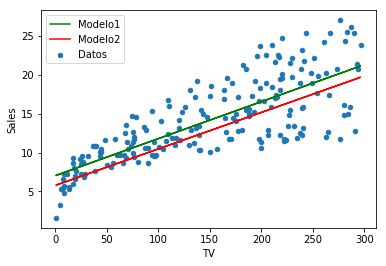

In [42]:
# Vemos la proyeccion del plano modelo para Newspaper = 0
data.plot(kind='scatter', x='TV', y='Sales', label='Datos')
plt.plot(pd.DataFrame(data['TV']), sales_pred, 'g', label='Modelo1')
plt.plot(pd.DataFrame(data['TV']), 5.774948 + 0.046901*data['TV'], 'r', label='Modelo2')
plt.legend(loc=0)
plt.show()

In [43]:
# Agregamos Radio al modelo lineal inicial
lm3 = smf.ols(formula='Sales~TV+Radio', data=data).fit()

In [45]:
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

<div class='alert alert-warning'>
    <p>El modelo predictivo seria:</p>
<p>Sales = 2.921100  + 0.045755*TV + 0.187994*Radio</p>
</div>

In [46]:
sales_pred3 = lm3.predict(data[['TV', 'Radio']])

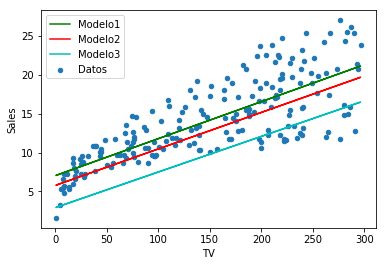

In [47]:
# Vemos la proyeccion del plano modelo para Newspaper = 0 y Radio = 0
data.plot(kind='scatter', x='TV', y='Sales', label='Datos')
plt.plot(pd.DataFrame(data['TV']), sales_pred, 'g', label='Modelo1')
plt.plot(pd.DataFrame(data['TV']), 5.774948 + 0.046901*data['TV'], 'r', label='Modelo2')
plt.plot(pd.DataFrame(data['TV']), 2.921100 + 0.045755*data['TV'], 'c', label='Modelo3')
plt.legend(loc=0)
plt.show()

In [48]:
# Agregamos Radio y Newspaper al modelo lineal inicial
lm4 = smf.ols(formula='Sales~TV+Radio+Newspaper', data=data).fit()

In [49]:
lm4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

<div class='alert alert-warning'>
    <p>El modelo predictivo seria:</p>
<p>Sales = 2.938889  + 0.045765*TV + 0.188530*Radio + -0.001037*Newspaper</p>
</div>

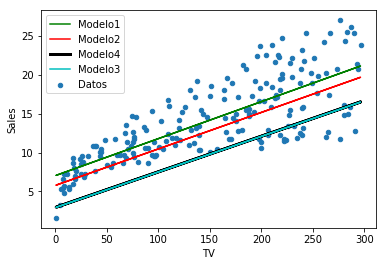

In [54]:
# Vemos la proyeccion del plano modelo para Newspaper = 0 y Radio = 0
data.plot(kind='scatter', x='TV', y='Sales', label='Datos')
plt.plot(pd.DataFrame(data['TV']), sales_pred, 'g', label='Modelo1')
plt.plot(pd.DataFrame(data['TV']), 5.774948 + 0.046901*data['TV'], 'r', label='Modelo2')
plt.plot(pd.DataFrame(data['TV']), 2.938889 + 0.045765*data['TV'], 'k', label='Modelo4', linewidth=3)
plt.plot(pd.DataFrame(data['TV']), 2.921100 + 0.045755*data['TV'], 'c', label='Modelo3')
plt.legend(loc=0)
plt.show()

In [55]:
print(lm.rsquared)
print(lm2.rsquared)
print(lm3.rsquared)
print(lm4.rsquared)

0.611875050850071
0.6458354938293271
0.8971942610828957
0.8972106381789522


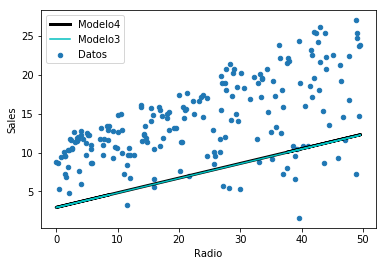

In [57]:
# Veamos en funcion de la radio.
data.plot(kind='scatter', x='Radio', y='Sales', label='Datos')
plt.plot(pd.DataFrame(data['Radio']), 2.938889 + 0.188530*data['Radio'], 'k', label='Modelo4', linewidth=3)
plt.plot(pd.DataFrame(data['Radio']), 2.921100 + 0.187994*data['Radio'], 'c', label='Modelo3')
plt.legend(loc=0)
plt.show()

# Multicolinealidad

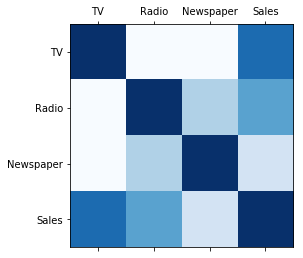

In [65]:
plt.matshow(data.corr(), cmap='Blues')
plt.xticks([0, 1, 2, 3], ['TV', 'Radio', 'Newspaper', 'Sales' ]);
plt.yticks([0, 1, 2, 3], ['TV', 'Radio', 'Newspaper', 'Sales' ]);

Como la radio tiene cierta relacion con el diario, entonces eso trae un conflicto en el modelo, por eso la prediccion se ve afectada al tener en cuenta estas dos variables, por eso debemos usar solo una de estas.

Calculamos el valor de inflacion de la varianza con  VIF = 1 / (1 - R^2)
* <b>VIF = 1</b> --> No hay correlación.
* <b>1 < VIF < 5</b> --> Correlación moderada.
* <b>5 < VIF</b> -->  Muy correlacionadas, deben ser borradas del modelo

In [67]:
# Newspaper --> TV + Radio
lm_n = smf.ols(formula='Newspaper~TV+Radio', data=data).fit()
R2_n = lm_n.rsquared
VIF_n = 1 / (1-R2_n)
VIF_n

1.1451873787239288

In [68]:
# TV --> Newspaper + Radio
lm_tv = smf.ols(formula='TV~Newspaper+Radio', data=data).fit()
R2_tv = lm_tv.rsquared
VIF_tv = 1 / (1-R2_tv)
VIF_tv

1.0046107849396502

In [69]:
# Radio --> Newspaper + TV
lm_r = smf.ols(formula='Radio~Newspaper+TV', data=data).fit()
R2_r = lm_r.rsquared
VIF_r = 1 / (1-R2_r)
VIF_r

1.1449519171055353

Vemos que la radio y el diario tienen casi el mismo VIF, así que estan algo correlacionadas, pero no con la Tv, ya que su VIF es de 1.  Nos quedamos con el modelo3, las ventas en funcion de la Tv y la radio.

In [75]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           4.83e-98
Time:                        12:36:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""